<a href="https://colab.research.google.com/github/paolofesta/prove-Comp-Soc/blob/master/Copia_di_Copia_di_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:

data=pd.read_csv('/content/csv1')
data

,ITTER107,Territorio,TIPO_DATO_CENERG,Tipo dato,DOTAZIONI_A,Fonte alimentazione,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,ENER_SOUR_EXP,spese delle famiglie per consumi energetici pe...,ALL,tutte le voci,2013,2013,42302968.0,NaN,NaN
1,IT,Italia,ENER_SOUR_EXP,spese delle famiglie per consumi energetici pe...,H_OIL,gasolio,2013,2013,1694455.0,NaN,NaN
2,IT,Italia,ENER_SOUR_EXP,spese delle famiglie per consumi energetici pe...,LPG,Gpl (Gas Petrolio Liquefatto),2013,2013,2437978.0,NaN,NaN
3,IT,Italia,ENER_SOUR_EXP,spese delle famiglie per consumi energetici pe...,ELECTR,energia elettrica,2013,2013,15035032.0,NaN,NaN
4,IT,Italia,ENER_SOUR_EXP,spese delle famiglie per consumi energetici pe...,METAN,metano,2013,2013,21080936.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
252,ITG2,Sardegna,ENER_SOUR_EXP_AV,spesa media effettiva delle famiglie per consu...,H_OIL,gasolio,2013,2013,1137.0,NaN,NaN
253,ITG2,Sardegna,ENER_SOUR_EXP_AV,spesa media effettiva delle famiglie per consu...,LPG,Gpl (Gas Petrolio Liquefatto),2013,2013,382.0,NaN,NaN
254,ITG2,Sardegna,ENER_SOUR_EXP_AV,spesa media effettiva delle famiglie per consu...,ELECTR,energia elettrica,2013,2013,753.0,NaN,NaN
255,ITG2,Sardegna,ENER_SOUR_EXP_AV,spesa media effettiva delle famiglie per consu...,FIREWOOD,legna,2013,2013,470.0,NaN,NaN


**l'obbiettivo è quello di misurare l'uso delle varie fonti energetiche nelle regioni italiane e osservarne la variazione negli ultimi anni**\
*fonte: dati Istat*

In [4]:
data.columns

Index(['ITTER107', 'Territorio', 'TIPO_DATO_CENERG', 'Tipo dato',
       'DOTAZIONI_A', 'Fonte alimentazione', 'TIME', 'Seleziona periodo',
       'Value', 'Flag Codes', 'Flags'],
      dtype='object')

'territorio': **indica la regione**\
 'DOTAZIONI_A': **indica la fonte energetica**\
'TIME': **indica il periodo, ovvero l'anno 2013(unico disponibile nell'archivio Istat)**\
'value':**indica spese delle famiglie per consumo di energia in migliaia di euro**


In [5]:
data1=pd.DataFrame(data,columns=["Territorio","DOTAZIONI_A","TIME","Value"])
data1

,Territorio,DOTAZIONI_A,TIME,Value
0,Italia,ALL,2013,42302968.0
1,Italia,H_OIL,2013,1694455.0
2,Italia,LPG,2013,2437978.0
3,Italia,ELECTR,2013,15035032.0
4,Italia,METAN,2013,21080936.0
...,...,...,...,...
252,Sardegna,H_OIL,2013,1137.0
253,Sardegna,LPG,2013,382.0
254,Sardegna,ELECTR,2013,753.0
255,Sardegna,FIREWOOD,2013,470.0


**Queste sono le colonne che ci servono per ora.
ci sono dati mancanti?**


In [6]:
pd.isnull(data1)

,Territorio,DOTAZIONI_A,TIME,Value
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
252,False,False,False,False
253,False,False,False,False
254,False,False,False,False
255,False,False,False,False


In [7]:
print("regioni in ordine di spesa per consumi energetici")
datab=data1.loc[data1['DOTAZIONI_A'].str.contains('ALL')]
data2=datab.sort_values("Value",ascending=False)
data2



regioni in ordine di spesa per consumi energetici


,Territorio,DOTAZIONI_A,TIME,Value
0,Italia,ALL,2013,42302968.0
50,Lombardia,ALL,2013,8107385.0
94,Veneto,ALL,2013,3954097.0
116,Emilia-Romagna,ALL,2013,3834384.0
17,Piemonte,ALL,2013,3724781.0
160,Lazio,ALL,2013,3693710.0
193,Campania,ALL,2013,2922781.0
127,Toscana,ALL,2013,2768507.0
237,Sicilia,ALL,2013,2564383.0
204,Puglia,ALL,2013,2212700.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

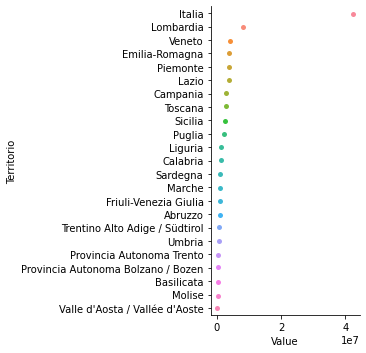

In [9]:
sns.catplot(data=data2,y='Territorio',x="Value")

**Lombardia\
Veneto\
Emilia-Romagna\
sono le regioni con maggiore spesa in consumi energetici**


In [10]:
data4=pd.DataFrame(data,columns=['DOTAZIONI_A'])
data5=data4[5:11]
data5
#le diverse fonti energetiche#

,DOTAZIONI_A
5,H_OIL
6,LPG
7,ELECTR
8,METAN
9,FIREWOOD
10,PELLETS


**GASOLIO(h_oil):**

In [11]:
dataz=data.loc[~data['Tipo dato'].str.contains('media')]
datag=dataz.loc[dataz['DOTAZIONI_A'].str.contains('H_OIL')]

data6=datag.sort_values('Value',ascending=False)
data7=pd.DataFrame(data6,columns=["Territorio","DOTAZIONI_A","TIME","Value"])
data7


,Territorio,DOTAZIONI_A,TIME,Value
1,Italia,H_OIL,2013,1694455.0
51,Lombardia,H_OIL,2013,306923.0
95,Veneto,H_OIL,2013,250645.0
18,Piemonte,H_OIL,2013,202441.0
249,Sardegna,H_OIL,2013,167498.0
62,Trentino Alto Adige / Südtirol,H_OIL,2013,141308.0
128,Toscana,H_OIL,2013,127180.0
161,Lazio,H_OIL,2013,98630.0
106,Friuli-Venezia Giulia,H_OIL,2013,78649.0
73,Provincia Autonoma Bolzano / Bozen,H_OIL,2013,72564.0


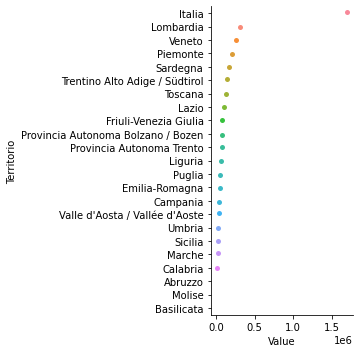

In [12]:
sns.catplot(data=data7,y='Territorio',x="Value")

**Lombardia\
Veneto\
Piemonte\
sono le regioni con la maggior spesa in consumi di gasolio**

**GAS LPG**

In [13]:
datap=dataz.loc[dataz['DOTAZIONI_A'].str.contains('LPG')]

data8=datap.sort_values('Value',ascending=False)
data9=pd.DataFrame(data8,columns=["Territorio","DOTAZIONI_A","TIME","Value"])
data9


,Territorio,DOTAZIONI_A,TIME,Value
2,Italia,LPG,2013,2437978.0
195,Campania,LPG,2013,322051.0
250,Sardegna,LPG,2013,265907.0
162,Lazio,LPG,2013,219912.0
239,Sicilia,LPG,2013,216050.0
96,Veneto,LPG,2013,215412.0
19,Piemonte,LPG,2013,193864.0
118,Emilia-Romagna,LPG,2013,152649.0
129,Toscana,LPG,2013,135410.0
228,Calabria,LPG,2013,126783.0


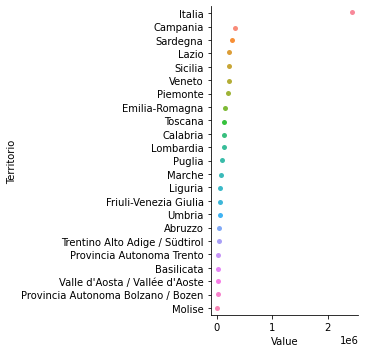

In [14]:
sns.catplot(data=data9,y='Territorio',x="Value")

**Campania\
Sardegna\
Lazio\
sono le regioni in cui si spende di più nel consumo di LPG**

**ENERGIA ELETTRICA**

In [15]:
datau=dataz.loc[dataz['DOTAZIONI_A'].str.contains('ELECTR')]

data10=datau.sort_values('Value',ascending=False)
data11=pd.DataFrame(data10,columns=["Territorio","DOTAZIONI_A","TIME","Value"])
data11

,Territorio,DOTAZIONI_A,TIME,Value
3,Italia,ELECTR,2013,15035032.0
53,Lombardia,ELECTR,2013,2398897.0
163,Lazio,ELECTR,2013,1470901.0
240,Sicilia,ELECTR,2013,1364016.0
196,Campania,ELECTR,2013,1341000.0
97,Veneto,ELECTR,2013,1284108.0
119,Emilia-Romagna,ELECTR,2013,1185561.0
20,Piemonte,ELECTR,2013,1037748.0
130,Toscana,ELECTR,2013,954410.0
207,Puglia,ELECTR,2013,933421.0


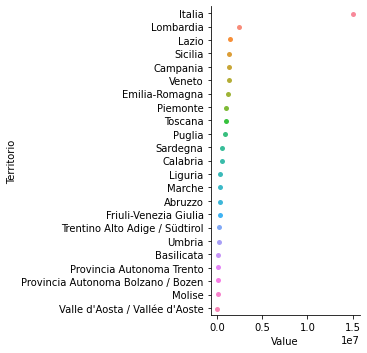

In [16]:
sns.catplot(data=data11,y='Territorio',x="Value")

**Lombardia\
Lazio\
Sicilia**


**METANO**

In [17]:
datak=dataz.query("DOTAZIONI_A=='METAN'")

data12=datak.sort_values('Value',ascending=False)
data13=pd.DataFrame(data12,columns=["Territorio","DOTAZIONI_A","TIME","Value"])
data13

,Territorio,DOTAZIONI_A,TIME,Value
4,Italia,METAN,2013,21080936.0
54,Lombardia,METAN,2013,5097828.0
120,Emilia-Romagna,METAN,2013,2355461.0
21,Piemonte,METAN,2013,2144882.0
98,Veneto,METAN,2013,1988115.0
164,Lazio,METAN,2013,1739425.0
131,Toscana,METAN,2013,1394350.0
208,Puglia,METAN,2013,1059807.0
197,Campania,METAN,2013,972679.0
241,Sicilia,METAN,2013,897942.0


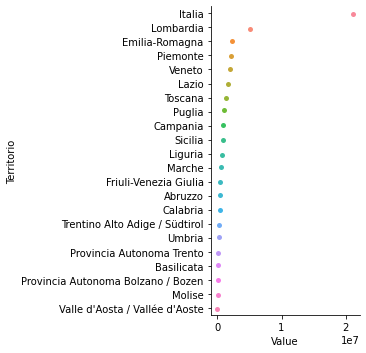

In [18]:
sns.catplot(data=data13,y='Territorio',x="Value")

**le regioni che in media consumano di più erano :**




**LOMBARDIA**

In [21]:
#totale:
L.query("DOTAZIONI_A=='ALL'")['Value']



50    8107385.0
Name: Value, dtype: float64

In [20]:
L=dataz.query("Territorio=='Lombardia'")
L1=pd.DataFrame(L,columns=['Territorio','DOTAZIONI_A','Value'])
L2=L1.query("DOTAZIONI_A!='ALL'")
L2

,Territorio,DOTAZIONI_A,Value
51,Lombardia,H_OIL,306923.0
52,Lombardia,LPG,119751.0
53,Lombardia,ELECTR,2398897.0
54,Lombardia,METAN,5097828.0


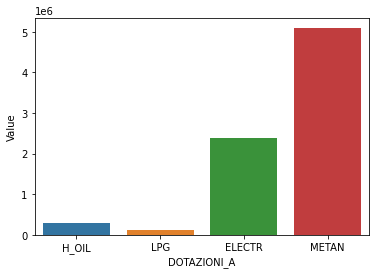

In [22]:
sns.barplot( x='DOTAZIONI_A',y='Value',data=L2)


**VENETO**

In [25]:
#totale:
V.query("DOTAZIONI_A=='ALL'")['Value']

94    3954097.0
Name: Value, dtype: float64

In [24]:
V=dataz.query("Territorio=='Veneto'")
V1=pd.DataFrame(V,columns=['Territorio','DOTAZIONI_A','Value'])
V2=V1.query("DOTAZIONI_A!='ALL'")
V2

,Territorio,DOTAZIONI_A,Value
95,Veneto,H_OIL,250645.0
96,Veneto,LPG,215412.0
97,Veneto,ELECTR,1284108.0
98,Veneto,METAN,1988115.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


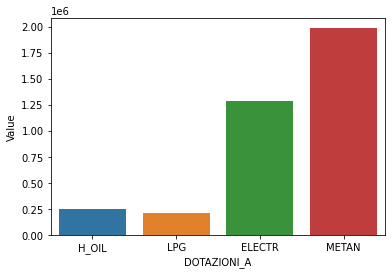

In [26]:
sns.barplot('DOTAZIONI_A','Value',data=V2)

**EMILIA-ROMAGNA**

In [28]:
#totale:
E.query("DOTAZIONI_A=='ALL'")['Value']

116    3834384.0
Name: Value, dtype: float64

In [27]:
E=dataz.query("Territorio=='Emilia-Romagna'")
E1=pd.DataFrame(E,columns=['Territorio','DOTAZIONI_A','Value'])
E2=E1.query("DOTAZIONI_A!='ALL'")
E2

,Territorio,DOTAZIONI_A,Value
117,Emilia-Romagna,H_OIL,49314.0
118,Emilia-Romagna,LPG,152649.0
119,Emilia-Romagna,ELECTR,1185561.0
120,Emilia-Romagna,METAN,2355461.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


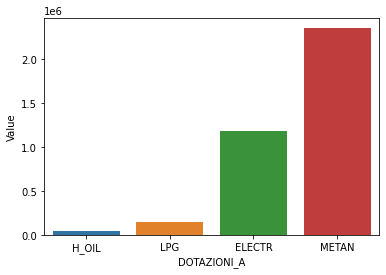

In [29]:
sns.barplot('DOTAZIONI_A','Value',data=E2)

**PIEMONTE**

In [31]:
#totale:
P.query("DOTAZIONI_A=='ALL'")['Value']


17    3724781.0
Name: Value, dtype: float64

In [30]:
P=dataz.query("Territorio=='Piemonte'")
P1=pd.DataFrame(P,columns=['Territorio','DOTAZIONI_A','Value'])
P2=P1.query("DOTAZIONI_A!='ALL'")
P2

,Territorio,DOTAZIONI_A,Value
18,Piemonte,H_OIL,202441.0
19,Piemonte,LPG,193864.0
20,Piemonte,ELECTR,1037748.0
21,Piemonte,METAN,2144882.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


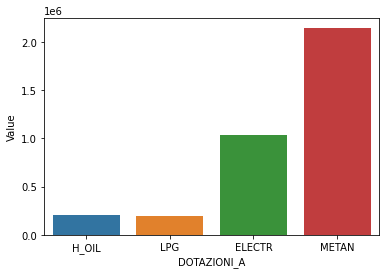

In [32]:
sns.barplot('DOTAZIONI_A','Value',data=P2)

In [39]:
datamed=data.loc[data['Tipo dato'].str.contains('media')]
datamed1=pd.DataFrame(datamed,columns=['Territorio','DOTAZIONI_A','Value'])
datamed1

,Territorio,DOTAZIONI_A,Value
5,Italia,H_OIL,1398.0
6,Italia,LPG,449.0
7,Italia,ELECTR,581.0
8,Italia,METAN,1004.0
9,Italia,FIREWOOD,457.0
...,...,...,...
252,Sardegna,H_OIL,1137.0
253,Sardegna,LPG,382.0
254,Sardegna,ELECTR,753.0
255,Sardegna,FIREWOOD,470.0


**datamed1 indica la spesa media effettiva per famiglia**

In [50]:
h=datamed1.query("DOTAZIONI_A=='H_OIL'")
h1=h.query("Territorio!='Italia'")
h1.sort_values('Value',ascending=False)



,Territorio,DOTAZIONI_A,Value
220,Basilicata,H_OIL,2502.0
121,Emilia-Romagna,H_OIL,2122.0
110,Friuli-Venezia Giulia,H_OIL,1934.0
99,Veneto,H_OIL,1750.0
154,Marche,H_OIL,1681.0
33,Valle d'Aosta / Vallée d'Aoste,H_OIL,1616.0
132,Toscana,H_OIL,1608.0
55,Lombardia,H_OIL,1558.0
88,Provincia Autonoma Trento,H_OIL,1543.0
66,Trentino Alto Adige / Südtirol,H_OIL,1538.0
